In [28]:
import numpy as np
import pandas as pd
from lightgbm import LGBMClassifier
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import SelectFromModel
from sklearn.datasets import load_iris

iris = load_iris() #загружаем набор данных


In [11]:
list (iris.target_names) #целевая переменная, сорт ириса

['setosa', 'versicolor', 'virginica']

In [12]:
iris['feature_names']   #признаки цветка

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [13]:
X = iris.data       #выводим данные
Y = iris.target

In [15]:
print(X[:10])    

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [14]:
print(Y)                 # 0-setosa, 1-versicolor, 2-virginica

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

model = LGBMClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(report)

Accuracy: 86.67%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.83      0.83      0.83        12
           2       0.82      0.82      0.82        11

    accuracy                           0.87        30
   macro avg       0.88      0.88      0.88        30
weighted avg       0.87      0.87      0.87        30



In [45]:
# data = DataFrame(iris.data)
# data_columns = iris.feature_names
# data['target'] = iris.target
# data['name'] = data.target.apply(lambda x: iris.target_names[x])
# data
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


Text(0.5, 1.0, 'petal width')

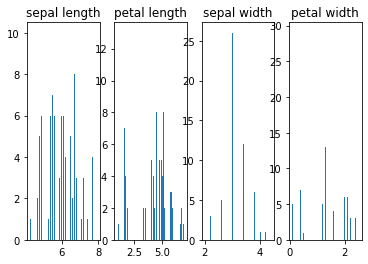

In [56]:
# plt.figure(figsize = (20, 24))
# plot_number = 0
# for feature_name in iris['feature_names']:
#     for target_name in iris['target_names']:
#        plot_number += 1
#        plt.subplot(4, 3, plot_number)
#        plt.hist(data[data.name == target_name][feature_name])
#        plt.title(target_name)
#        plt.xlabel('cm')
#        plt.ylabel(feature_name[:-4])
fig, axs = plt.subplots(1, 4)
n_bins = len(data)
axs[0].hist(data['sepal length (cm)'], bins=n_bins)
axs[0].set_title('sepal length')
axs[1].hist(data['petal length (cm)'], bins=n_bins)
axs[1].set_title('petal length')
axs[2].hist(data['sepal width (cm)'], bins = n_bins)
axs[2].set_title('sepal width')
axs[3].hist(data['petal width (cm)'], bins = n_bins)
axs[3].set_title('petal width')
